# Logistic Regression: Final model

This notebook features the model selected for further processing. It uses trigrams as features and logistic regression for classification.

In [1]:
%run notebook_utils.py

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
import matplotlib

# set big font in plots
SMALL_SIZE = 20
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [4]:
%cd ..
from langid import sanitize, np_sanitize
%cd -

/Users/Lin/git/SwigSpot/language-detection
/Users/Lin/git/SwigSpot/language-detection/notebooks


## Data loading

In [5]:
X, y = load_data()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
sms_any_X, sms_any_y = load_sms_any()
X_valid, y_valid = load_validation_data()

# Model training

In [6]:
vect_options = dict(
    analyzer='char', 
    max_features=10000, 
    ngram_range=(3, 3),
    sublinear_tf=True, 
    use_idf=True
)

logreg_options = dict(C=1)

pipe = Pipeline([
    ('vect', TfidfVectorizer(**vect_options)),
    ('clf', LogisticRegression(**logreg_options))
])

pipe.fit(np_sanitize(X_train), y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(3, 3), norm='l2', preprocessor=None, smooth_idf=True,
 ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

# Model evaluation

TEST SET
accuracy: 0.9940

             precision    recall  f1-score   support

         de     0.9938    0.9884    0.9911      1462
         fr     0.9993    0.9980    0.9986      1468
         en     0.9987    0.9928    0.9958      1538
         it     0.9980    0.9980    0.9980      1482
         sg     0.9801    0.9930    0.9865      1438

avg / total     0.9941    0.9940    0.9941      7388



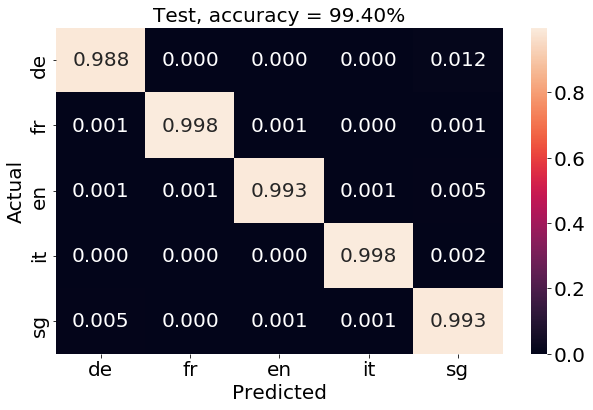

SMS RECALL
total samples    10692
total errors        63 (0.59%)
---------------------------------
languages detected
    de       55
    fr        2
    en        4
    it        2
    sg    10629


SMS ANY
accuracy: 0.8587

             precision    recall  f1-score   support

         de     1.0000    0.7164    0.8348       201
         fr     0.9946    0.9154    0.9534       201
         en     1.0000    0.6915    0.8176       201
         it     0.9949    0.9701    0.9824       201
         sg     0.5894    1.0000    0.7417       201

avg / total     0.9158    0.8587    0.8660      1005



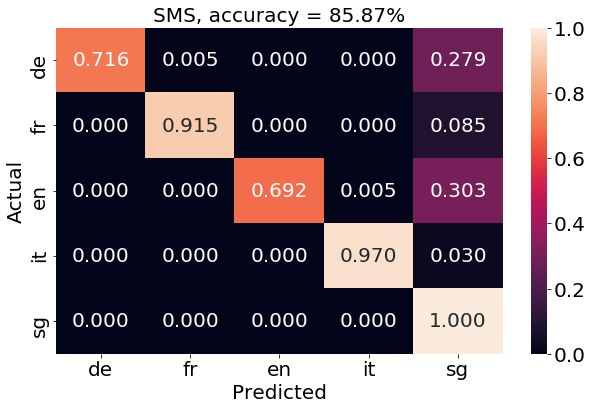



VALIDATION SET
accuracy: 0.9855

             precision    recall  f1-score   support

         de     0.9514    0.9889    0.9698      2613
         fr     0.9985    0.9981    0.9983      2613
         en     0.9977    0.9962    0.9969      2613
         it     0.9977    0.9989    0.9983      2613
         sg     0.9837    0.9457    0.9643      2613

avg / total     0.9858    0.9855    0.9855     13065



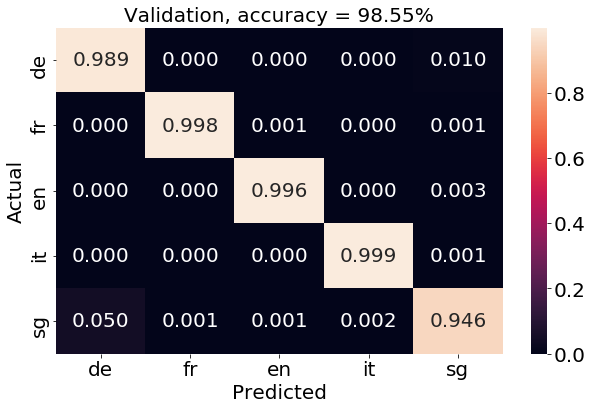

In [7]:
print("TEST SET")
print("========")
y_pred = pipe.predict(np_sanitize(X_test))
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True, 
    title="Test, accuracy = %.2f%%" % (metrics.accuracy_score(y_test, y_pred) * 100))
print("SMS RECALL")
print("==========")

test_recall_with_sms(pipe)

print("\n\nSMS ANY")
print("==========")
y_sms_any_pred = pipe.predict(np_sanitize(sms_any_X))
print_results(sms_any_y, y_sms_any_pred)
plot_confusion_matrix(sms_any_y, y_sms_any_pred, normalised=True,
    title="SMS, accuracy = %.2f%%" % (metrics.accuracy_score(sms_any_y, y_sms_any_pred) * 100))

print("\n\nVALIDATION SET")
print("===============")
y_valid_pred = pipe.predict(np_sanitize(X_valid))
print_results(y_valid, y_valid_pred)
plot_confusion_matrix(y_valid, y_valid_pred, normalised=True,
    title="Validation, accuracy = %.2f%%" % (metrics.accuracy_score(y_valid, y_valid_pred) * 100))

# Model export

In [8]:
import pickle

filename = "Sanitize-TfidfVec_feat10000_trigrams-logreg_C1.pickle"
with open(filename, 'wb') as f: pickle.dump(pipe, f)